In [7]:
# ------------------------------------------------------------------------------------------------------------------------------------------------------------
# Data Handling and Processing
import numpy as np
import pandas as pd
import math
from sklearn.impute import KNNImputer
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer
# ------------------------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------------------------
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import viztoolz as viz
import mltoolz as mlt
# ------------------------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------------------------
# Model Selection, Metrics & Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# ------------------------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------------------------
# Pipeline Construction 
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# ------------------------------------------------------------------------------------------------------------------------------------------------------------

---
### Load processed dataset

In [8]:
train = pd.read_csv('../data/processed/train.csv')

print('-'*16)
print(f'Train Set Shape:\n{train.shape}')
print('-'*16)

----------------
Train Set Shape:
(8693, 29)
----------------


In [9]:
info_df = mlt.describe_and_suggest(train)
info_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 29 columns)
dtypes: int64(16), float64(7), object(6)
memory usage: 4315.5 KB

Total Percentage of Null Values: 0.00%


,Data Type,Not-Null,Missing,Missing (%),Unique,Cardinality (%),Suggested Type
PassengerId,object,8693,0,0.0,8693,100.00,Categorical
HomePlanet,object,8693,0,0.0,3,0.03,Categorical
CryoSleep,int64,8693,0,0.0,2,0.02,Binary
Destination,object,8693,0,0.0,3,0.03,Categorical
Age,float64,8693,0,0.0,131,1.51,Numerical Discrete
VIP,int64,8693,0,0.0,2,0.02,Binary
RoomService,float64,8693,0,0.0,1344,15.46,Numerical Continuous
FoodCourt,float64,8693,0,0.0,1566,18.01,Numerical Continuous
ShoppingMall,float64,8693,0,0.0,1180,13.57,Numerical Continuous
Spa,float64,8693,0,0.0,1396,16.06,Numerical Continuous


In [24]:
all_features = [col for col in info_df.index]

In [10]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,RoomService_big_spender,FoodCourt_used,FoodCourt_big_spender,ShoppingMall_used,ShoppingMall_big_spender,Spa_used,Spa_big_spender,VRDeck_used,VRDeck_big_spender,TotalSpent_big_spender
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,...,0,1,0,1,0,1,1,1,0,0
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,...,0,1,1,0,0,1,1,1,0,1
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,...,0,1,1,1,1,1,1,1,1,1
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,...,1,1,0,1,1,1,1,1,0,0


---
---
## Colinearity Checks with PhiK Correlation Matrix

- Browsing ML notebooks and examples on Kaggle, the number of people incorrectly using correlation statistics has really shocked me.
- In pandas DataFrame.corr() method uses Pearson's correlation (by default) which is not so appropriate with categorical variables.
- PhiK Matrix internally uses chi2 based correlation and normalizes the statistic for reporting. This is beneficial as it allows for categoric-categoric comparison.
- PhiK also uses GridSearch internally to automatically bin continuous variables and calculate a chi-2 statistic, allowing viable correlation statistics between categorical and numerical variables, as well as between numerical and other numerical variables.

- PhiK seems like a far more robust option for considering colinearity in a mixed variable type dataset.

In [11]:
cat_cols = info_df[info_df['Suggested Type'].isin(['Categorical', 'Binary'])].index.to_list()
num_cols = info_df[info_df['Suggested Type'].isin(['Numerical Discrete', 'Numerical Continuous'])].index.to_list()
cat_cols.remove('Transported')

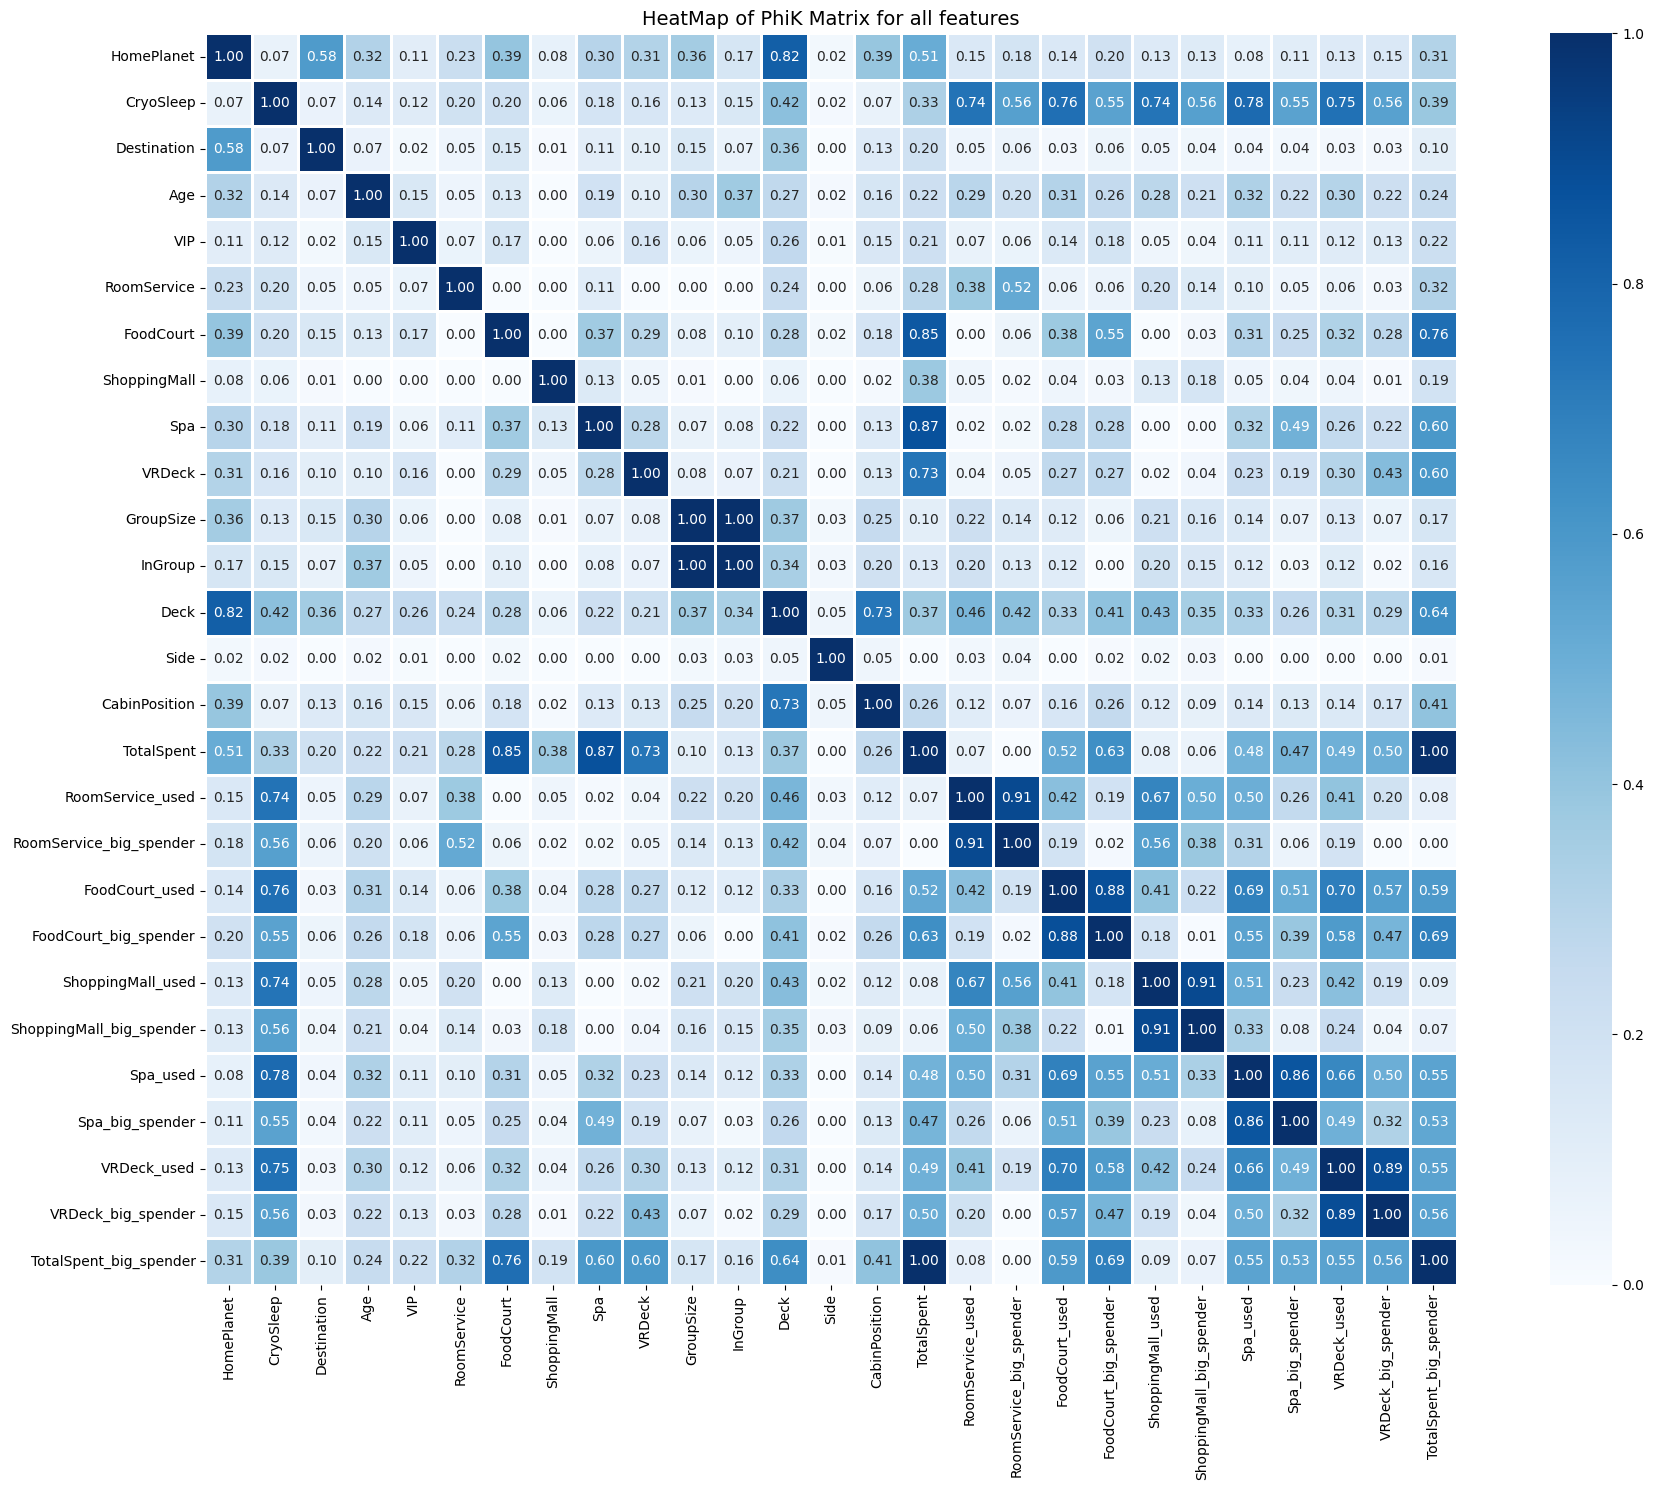

In [12]:
viz.phikmap(train.drop(['Transported','PassengerId'], axis=1), interval_cols=num_cols, figsize=(20,15))

---
# PhiK correlations with Target

In [13]:
phik_corr = train.drop('PassengerId', axis=1).phik_matrix(interval_cols=num_cols)
phik_df = pd.DataFrame(phik_corr['Transported'].drop('Transported').sort_values(ascending=False))

In [17]:
phik_df

,Transported
CryoSleep,0.658531
RoomService_used,0.529633
Spa_used,0.522527
VRDeck_used,0.503690
Spa_big_spender,0.472953
RoomService_big_spender,0.472636
VRDeck_big_spender,0.442773
ShoppingMall_used,0.415310
FoodCourt_used,0.368691
Deck,0.282862


In [23]:
all_features = [feat for feat in phik_df.index]

In [18]:
phik_selection = phik_df[phik_df['Transported'] > 0.2]

In [19]:
phik_selection = [feat for feat in phik_selection.index]

In [20]:
phik_selection

['CryoSleep',
 'RoomService_used',
 'Spa_used',
 'VRDeck_used',
 'Spa_big_spender',
 'RoomService_big_spender',
 'VRDeck_big_spender',
 'ShoppingMall_used',
 'FoodCourt_used',
 'Deck',
 'Spa',
 'ShoppingMall_big_spender',
 'RoomService',
 'VRDeck']

---
## K-Nearest Neighbors with Gower Distance

I wanted to be able to use a KNN algorithm to attempt to find patterns in the dataset. However, the standard Euclidean or Manhattan distances which require on purely numerical data or at least categorical variables that have been one-hot encoded. Given that this dataset has mixed categorical and numerical variables it seems like a good opportunity to try out using Gower distance in combination with KNN

In [10]:
import gower
from sklearn.neighbors import KNeighborsClassifier

In [9]:
target = 'Transported'

X = train.drop(target, axis=1)
y = train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13, stratify=y)

In [11]:
# Calculate Gower distance for X_train
gower_dist_train = gower.gower_matrix(X_train)

# Calculate pairwise distances between train and test
gower_dist_test = gower.gower_matrix(X_test, X_train)

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='precomputed')

# Fit KNN with Gower distances
knn.fit(gower_dist_train, y_train)

# Predict on the test set
y_preds = knn.predict(gower_dist_test)

In [12]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1079
           1       0.75      0.74      0.74      1095

    accuracy                           0.74      2174
   macro avg       0.74      0.74      0.74      2174
weighted avg       0.74      0.74      0.74      2174

